In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
# Load the subset of the CIFAKE dataset
dataset_dir = "/kaggle/input/cifake-subset-2/CIFAKE-Subset/"
print("Loading dataset from: " + dataset_dir)

Loading dataset from: /kaggle/input/cifake-subset-2/CIFAKE-Subset/


In [3]:
# Just to make sure the image size is 32x32
img_height = 32
img_width = 32
batch_size = 32

# Load the training data
train_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_dir + "/train",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

# Load the validation data
val_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_dir + "/validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

# Check if the data is properly loaded
print("Training Classes:")
class_names = train_ds.class_names
print(class_names)

print("Validation Classes:")
class_names = val_ds.class_names
print(class_names)

Found 4000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Training Classes:
['FAKE', 'REAL']
Validation Classes:
['FAKE', 'REAL']


In [4]:
# Building the CNN
layers = []
layers.append(tf.keras.layers.Rescaling(1./255)) # Normalise pixel values
layers.append(tf.keras.layers.Conv2D(128, 3, activation='relu'))
layers.append(tf.keras.layers.MaxPooling2D())
layers.append(tf.keras.layers.Conv2D(128, 3, activation='relu'))
layers.append(tf.keras.layers.MaxPooling2D())
layers.append(tf.keras.layers.Conv2D(128, 3, activation='relu'))
layers.append(tf.keras.layers.MaxPooling2D())
layers.append(tf.keras.layers.Flatten())

# Building the ANN
layers.append(tf.keras.layers.Dense(256, activation='relu'))
layers.append(tf.keras.layers.Dense(256, activation='relu'))
layers.append(tf.keras.layers.Dense(256, activation='relu'))
layers.append(tf.keras.layers.Dense(1, activation='sigmoid'))

# Create and compile the model from layers
model = tf.keras.Sequential(layers)
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.BinaryCrossentropy(),
  metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

# Build the model so we can see a summary
model.build(input_shape=(None, 32, 32, 3))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 32, 32, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 128)         0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         1

In [5]:
# Check if GPUs are available for training 
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [6]:
# Finally, train the model

print("Starting training...")
train_history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=5,
  verbose=1
)
print("Training finished.")

Starting training...
Epoch 1/5
125/125 [==============================] - 16s 112ms/step - loss: 0.6019 - accuracy: 0.6733 - precision: 0.6793 - recall: 0.6565 - val_loss: 0.4755 - val_accuracy: 0.7650 - val_precision: 0.7553 - val_recall: 0.7840
Epoch 2/5
125/125 [==============================] - 13s 100ms/step - loss: 0.4768 - accuracy: 0.7830 - precision: 0.7734 - recall: 0.8005 - val_loss: 0.4545 - val_accuracy: 0.7930 - val_precision: 0.7293 - val_recall: 0.9320
Epoch 3/5
125/125 [==============================] - 12s 94ms/step - loss: 0.4285 - accuracy: 0.8060 - precision: 0.8078 - recall: 0.8030 - val_loss: 0.3641 - val_accuracy: 0.8450 - val_precision: 0.8758 - val_recall: 0.8040
Epoch 4/5
125/125 [==============================] - 13s 101ms/step - loss: 0.4126 - accuracy: 0.8140 - precision: 0.8178 - recall: 0.8080 - val_loss: 0.4123 - val_accuracy: 0.8330 - val_precision: 0.7681 - val_recall: 0.9540
Epoch 5/5
125/125 [==============================] - 13s 104ms/step - loss: 

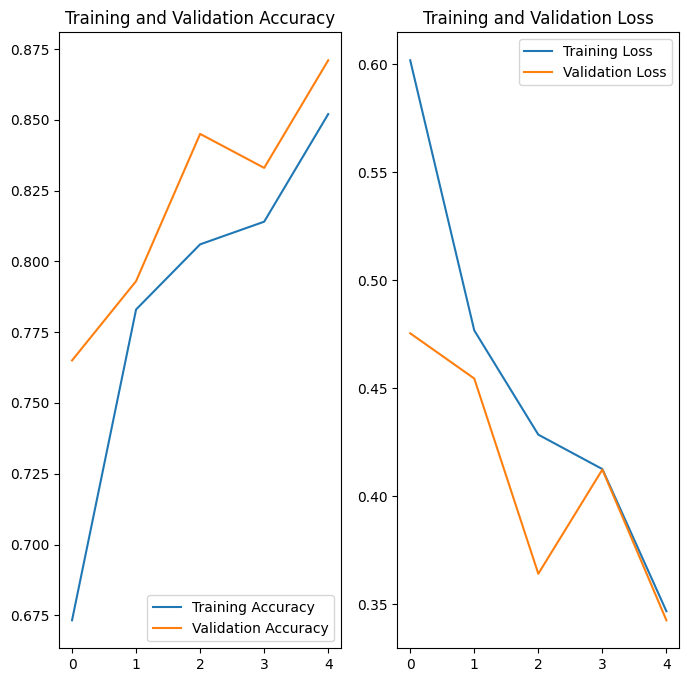

In [7]:
# Plot the accuracy and loss for training and validation datasets
acc = train_history.history['accuracy']
val_acc = train_history.history['val_accuracy']

loss = train_history.history['loss']
val_loss = train_history.history['val_loss']

epochs_range = range(5)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('plot.png')
plt.show()

In [8]:
# Validate the dataset
print('Validation Loss: ', np.mean(train_history.history['val_loss']))
print('Validation Accuracy: ', np.mean(train_history.history['val_accuracy']))
print('Validation Recall: ', np.mean(train_history.history['val_recall']))
print('Validation Precision: ', np.mean(train_history.history['val_precision']))

Validation Loss:  0.4097796678543091
Validation Accuracy:  0.8213999986648559
Validation Recall:  0.876800000667572
Validation Precision:  0.7945303916931152


In [9]:
# Load the test data
test_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_dir + "/test",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

# Check if the data is properly loaded
print("Testing Classes:")
class_names = test_ds.class_names
print(class_names)

Found 1000 files belonging to 2 classes.
Testing Classes:
['FAKE', 'REAL']


In [10]:
# Check performace of model on test dataset
test_loss, test_accuracy, test_precision, test_recall = model.evaluate(test_ds, verbose=1, batch_size=batch_size)
print('\nTesting Results...')
print('Test Loss: ', test_loss)
print('Test Accuracy: ', test_accuracy)
print('Test Precision: ', test_precision)
print('Test Recall: ', test_recall)

32/32 [==============================] - 2s 37ms/step - loss: 0.3868 - accuracy: 0.8450 - precision: 0.8154 - recall: 0.8920

Testing Results...
Test Loss:  0.3867960274219513
Test Accuracy:  0.8450000286102295
Test Precision:  0.8153564929962158
Test Recall:  0.8920000195503235
